# Mugloest - 6 ADCP Experiment (March, 2013) 
&nbsp;<br>
## Junta ADCP e CTs
&nbsp;<br>
# Faz Figura 2 (copia do Muglo_6adcp_junta)

<div>
    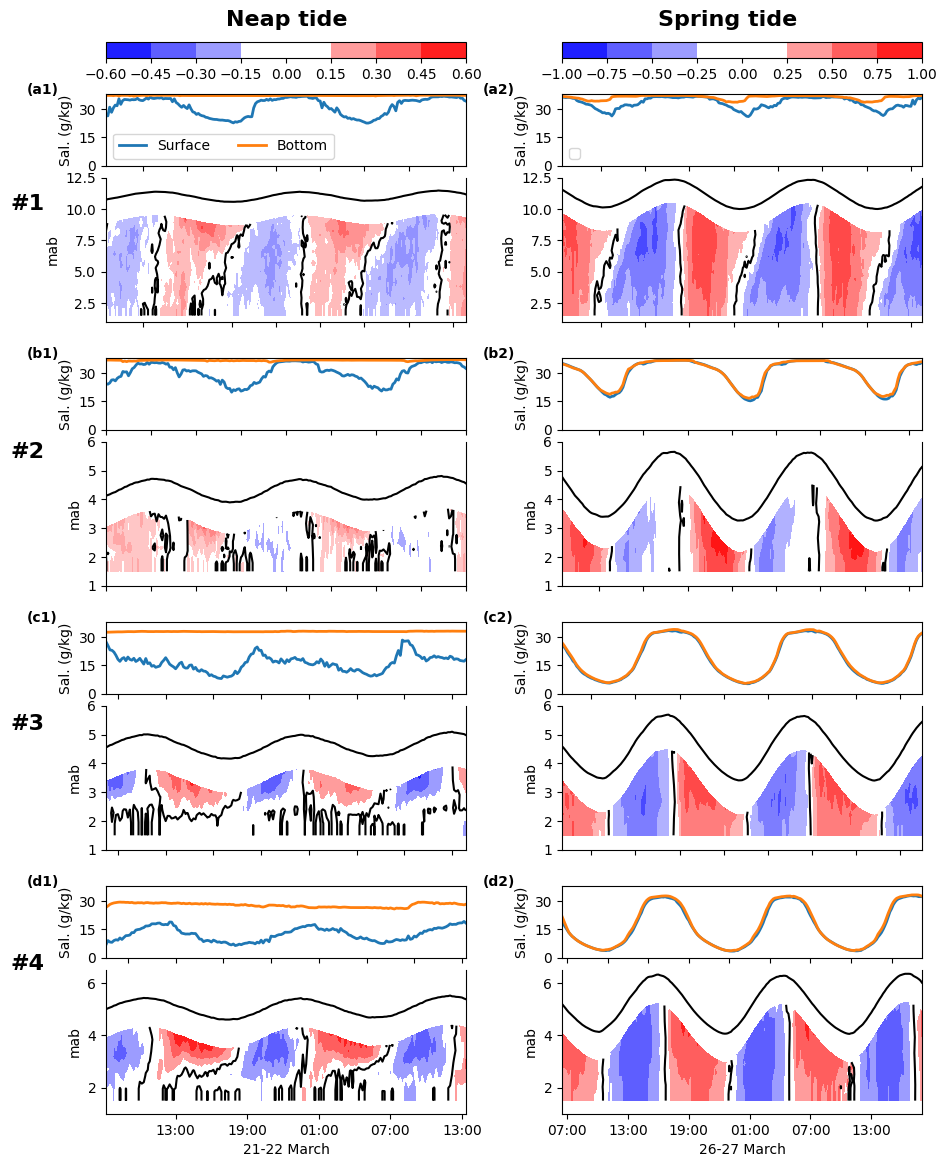
</div>


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from pprint import pprint
import seawater as sea
import scipy.signal as signal

C:\Users\gutos\AppData\Local\Temp\ipykernel_21676\2304090885.py:7: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sea


# Filter design
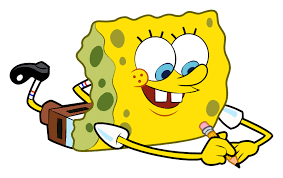

In [2]:
# removing high frequency oscillations
dt = 600    # 10 minutes in seconds
fs = 1/dt   # frequency of sampling
fc = 1/7200 # cut frequency 1 hour
fn = fs/2   # Nyquist frequency
fc_norm = fc / fn

b, a = signal.butter(N=4, Wn = fc_norm, btype = 'lowpass')

## Upload the reduced data (dictionary)

In [3]:
with open('Muglo_6ADCP_CT_dic.pkl', 'rb') as io:
    dic = pickle.load(io)

In [4]:
for c in dic:
    print(c)
print('')
for c in dic['neap']:
    print(c)
print('')
for c in dic['neap']['PF']:
    print(c)
print('')
for c in dic['neap']['PF']['surface']:
    print(c)

neap
spring

Praticagem
PF
Hospital
Rampa
Bombeiros
JoanaBezerra

time
pressure
temperature
time2d
z2d
currents2d
surface
bottom

temperature
salinity
density


## To extract the data from the dictionary to work with lists

In [5]:
# get the content of the dictionarly and create a list
def get_vars(campaign, station):
    time2d = dic[campaign][station]['time2d']
    z2d =    dic[campaign][station]['z2d']
    curr =   dic[campaign][station]['currents2d'] * -1  # Arnoldo´s convention flood (-), ebb (+)
    press =  dic[campaign][station]['pressure']
    time =   dic[campaign][station]['time']
    temp_s = dic[campaign][station]['surface']['temperature']
    sal_s =  dic[campaign][station]['surface']['salinity']
    temp_f = dic[campaign][station]['bottom']['temperature']
    sal_f =  dic[campaign][station]['bottom']['salinity']
    rho_s =  dic[campaign][station]['surface']['density']
    rho_f =  dic[campaign][station]['bottom']['density']

    bunch = [time2d, z2d, curr, time, press, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]
    return bunch

s1 = get_vars('spring', 'Praticagem')
n1 = get_vars('neap', 'Praticagem')

s2 = get_vars('spring', 'PF')
n2 = get_vars('neap', 'PF')

s3 = get_vars('spring', 'Bombeiros')
n3 = get_vars('neap', 'Bombeiros')

s4 = get_vars('spring', 'Hospital')
n4 = get_vars('neap', 'Hospital')

s5 = get_vars('spring', 'Rampa')
n5 = get_vars('neap', 'Rampa')

s6 = get_vars('spring', 'JoanaBezerra')
n6 = get_vars('neap', 'JoanaBezerra')

# coloca a ordem utilizada no artigo do Arnoldo 
# Praticagem, PF, Hospital, Rampa

N = [n1, n2, n4, n5]
S = [s1, s2, s4, s5]

CPS = [N, S] # campanhas

In [6]:
# bunch = [time2d, z2d, curr, press, time, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]

## Smoothing the data 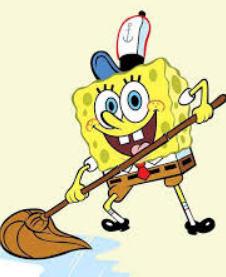

In [10]:
def filt_mtx(s):
    li, co = s.shape
    sf = np.full((li, co), np.nan)
    for l in range(li):
        i_good = np.where(~np.isnan(s[l,:]))[0]
        sf[l,i_good] = signal.filtfilt(b, a, s[l,i_good])
    return sf

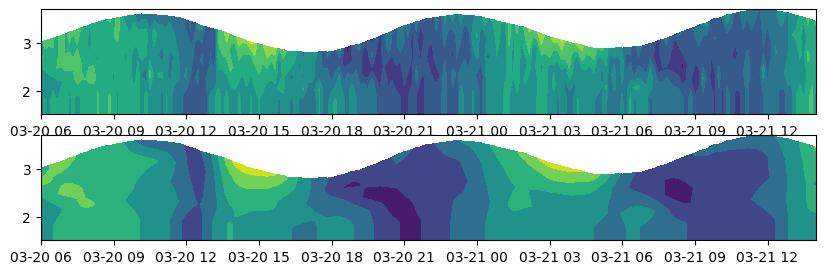

In [20]:
t = N[1][0]
z = N[1][1]
c = N[1][2]
fig, axs = plt.subplots(2, figsize=(10,3))
axs[0].contourf(t.T, z.T, c.T)
axs[1].contourf(t.T, z.T, filt_mtx(c.T))

# Figura 2 artigo Arnoldo

In [7]:
# chatgpt - criando uma zona branca no zero do bwr

c_levels = 50

cmap = plt.get_cmap('bwr', c_levels)
colors = cmap(np.linspace(0, 1, c_levels))

f = 0.1
mid = int(c_levels*f)

center = c_levels // 2
colors[center-mid:center+mid] = [1,1,1,1]

new_cmap = mcolors.ListedColormap(colors, name='bwr2')

C:\Users\gutos\AppData\Local\Temp\ipykernel_21676\753969518.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(ncol=2)


Text(0.02, -0.01, '#4')

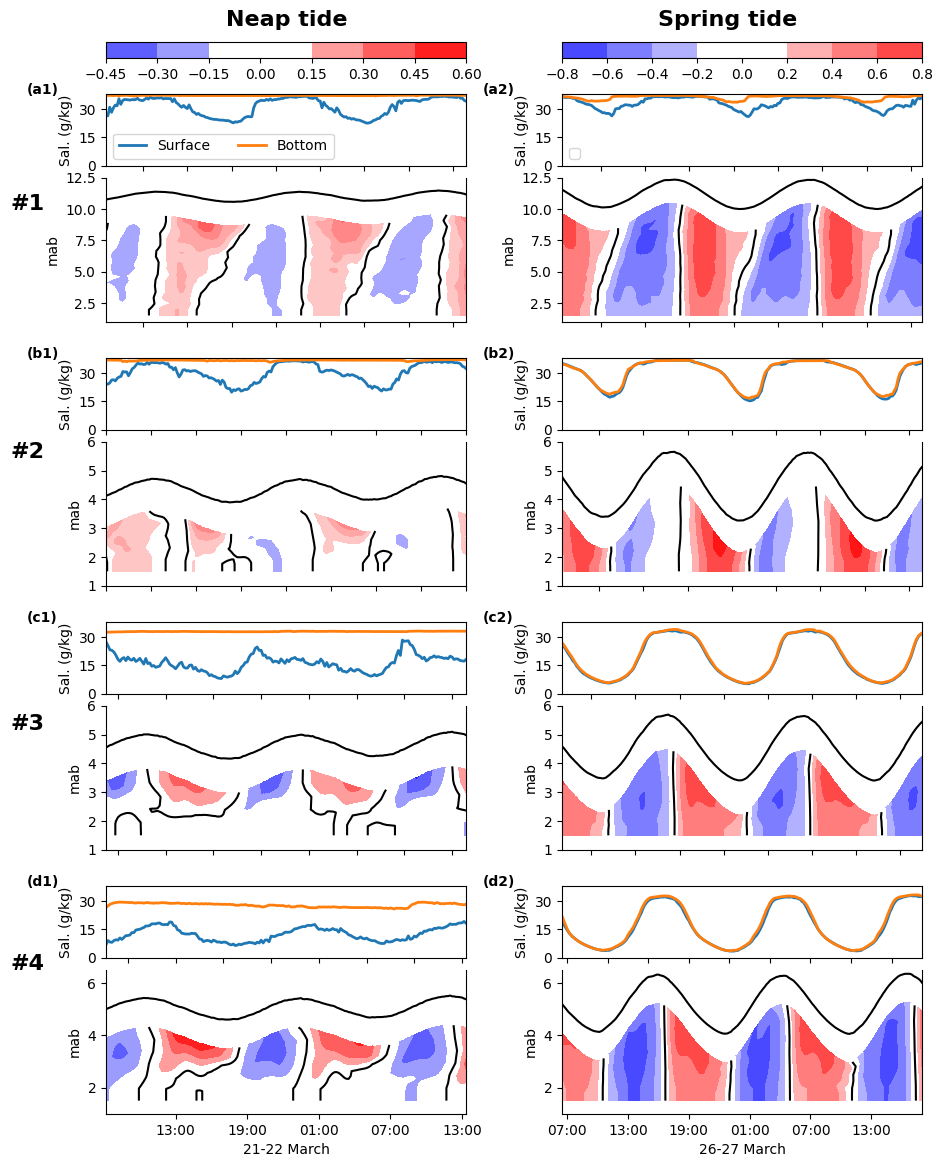

In [23]:
fig = plt.figure(figsize=(12,8))

px = .1
py = .8
dx = .3
dy = .18
dy2 = .09
cb_dx = .01
int_v = .15
int_h = -0.02

axc1 = []
axc2 = []
axc1t = []
axc2t = []
axc1cb = []
axc2cb = []

ylims = [(1, 12.5), (1,6), (1, 6), (1, 6.5)]
letters1 = ['(a1)', '(b1)', '(c1)', '(d1)']
letters2 = ['(a2)', '(b2)', '(c2)', '(d2)']

for i in range(4):
    axc1.append(fig.add_axes([px, py-(dy+int_v)*i, dx, dy]))
    axc2.append(fig.add_axes([px*2+dx+int_h, py-(dy+int_v)*i, dx, dy]))

    axc1t.append(fig.add_axes([px, py+dy+.015-(dy+int_v)*i, dx, dy2])) 
    axc2t.append(fig.add_axes([px*2+dx+int_h, py+dy+.015-(dy+int_v)*i, dx, dy2])) 
    
    # column left (Neap)
    norm = mcolors.TwoSlopeNorm(vmin = -0.6, vcenter=0, vmax = 0.6)
    cb1 = axc1[i].contourf(N[i][0].T, N[i][1].T, filt_mtx(N[i][2].T), cmap=new_cmap, norm=norm)
    axc1[i].contour(N[i][0].T, N[i][1].T, filt_mtx(N[i][2].T), [0], colors='k')
    axc1[i].plot(N[i][3], N[i][4], 'k')
    #plt.colorbar(cb1, cax=axc1cb[i])

    axc1t[i].plot(N[i][3], N[i][6], label='Surface', lw=2)
    axc1t[i].plot(N[i][3], N[i][8], label='Bottom', lw=2)
    axc1t[i].set_xlim(N[i][3][0], N[i][3][-1])
    axc1t[i].text(-0.22, 1, letters1[i], transform=axc1t[i].transAxes, fontweight='bold')

    # column right
    norm = mcolors.TwoSlopeNorm(vmin = -1, vcenter=0, vmax = 1)
    cb2 = axc2[i].contourf(S[i][0].T, S[i][1].T, filt_mtx(S[i][2].T), cmap=new_cmap, norm=norm)
    axc2[i].contour(S[i][0].T, S[i][1].T, filt_mtx(S[i][2].T), [0], colors='k')
    axc2[i].plot(S[i][3], S[i][4], 'k')
    #plt.colorbar(cb2, cax=axc2cb[i])

    axc2t[i].plot(S[i][3], S[i][6], lw=2)
    axc2t[i].plot(S[i][3], S[i][8], lw=2)
    axc2t[i].set_xlim(S[i][3][0], S[i][3][-1])
    axc2t[i].text(-0.22, 1, letters2[i], transform=axc2t[i].transAxes, fontweight='bold')

    axst = [axc1t[i], axc2t[i]]
    for j, ax in enumerate(axst):
        ax.set_xticklabels('')
        ax.set_ylim(0, 38)
        ax.set_ylabel('Sal. (g/kg)')
        ax.set_yticks([0, 15, 30])
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
        if i == 0 & j == 0:
            ax.legend(ncol=2)

    axc = [axc1[i], axc2[i]]
    for j, ax in enumerate(axc):
        ax.spines['top'].set_visible(False)
        ax.set_ylim(ylims[i])
        ax.set_ylabel('mab')
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
        if i < 3:
            ax.set_xticklabels('')
        if i == 3:
            ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
            if j == 0:    
                ax.set_xlabel('21-22 March')
            else:
                ax.set_xlabel('26-27 March')

cbar_ax1 = fig.add_axes([px, 1.13, dx, .02])
cbar_ax2 = fig.add_axes([px*2+dx+int_h, 1.13, dx, .02])

fig.colorbar(cb1, cax=cbar_ax1, orientation='horizontal')
fig.colorbar(cb2, cax=cbar_ax2, orientation='horizontal')

fig.text(.2, 1.17, 'Neap tide', fontsize=16, fontweight='bold')
fig.text(.56, 1.17, 'Spring tide', fontsize=16, fontweight='bold')
fig.text(0.02, .94, '#1', fontsize=16, fontweight='bold')
fig.text(0.02, .63, '#2', fontsize=16, fontweight='bold')
fig.text(0.02, .29, '#3', fontsize=16, fontweight='bold')
fig.text(0.02, -.01, '#4', fontsize=16, fontweight='bold')

### same figure, without smoothing...

C:\Users\gutos\AppData\Local\Temp\ipykernel_21676\2551063626.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(ncol=2)


Text(0.02, -0.01, '#4')

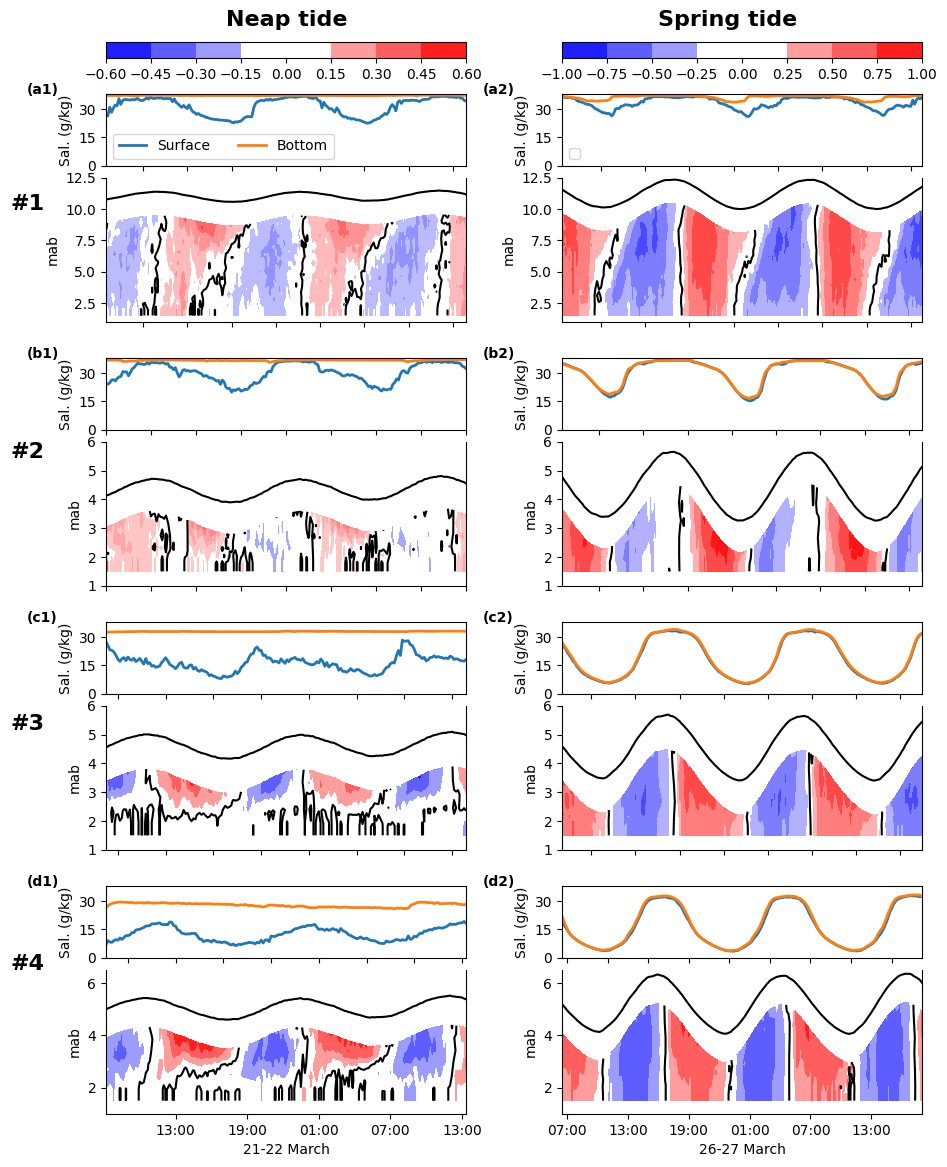

In [8]:
fig = plt.figure(figsize=(12,8))

px = .1
py = .8
dx = .3
dy = .18
dy2 = .09
cb_dx = .01
int_v = .15
int_h = -0.02

axc1 = []
axc2 = []
axc1t = []
axc2t = []
axc1cb = []
axc2cb = []

ylims = [(1, 12.5), (1,6), (1, 6), (1, 6.5)]
letters1 = ['(a1)', '(b1)', '(c1)', '(d1)']
letters2 = ['(a2)', '(b2)', '(c2)', '(d2)']

for i in range(4):
    axc1.append(fig.add_axes([px, py-(dy+int_v)*i, dx, dy]))
    axc2.append(fig.add_axes([px*2+dx+int_h, py-(dy+int_v)*i, dx, dy]))

    axc1t.append(fig.add_axes([px, py+dy+.015-(dy+int_v)*i, dx, dy2])) 
    axc2t.append(fig.add_axes([px*2+dx+int_h, py+dy+.015-(dy+int_v)*i, dx, dy2])) 

    # column left (Neap)
    norm = mcolors.TwoSlopeNorm(vmin = -0.6, vcenter=0, vmax = 0.6)
    cb1 = axc1[i].contourf(N[i][0].T, N[i][1].T, N[i][2].T, cmap=new_cmap, norm=norm)
    axc1[i].contour(N[i][0].T, N[i][1].T, N[i][2].T, [0], colors='k')
    axc1[i].plot(N[i][3], N[i][4], 'k')
    #plt.colorbar(cb1, cax=axc1cb[i])

    axc1t[i].plot(N[i][3], N[i][6], label='Surface', lw=2)
    axc1t[i].plot(N[i][3], N[i][8], label='Bottom', lw=2)
    axc1t[i].set_xlim(N[i][3][0], N[i][3][-1])
    axc1t[i].text(-0.22, 1, letters1[i], transform=axc1t[i].transAxes, fontweight='bold')

    # column right
    norm = mcolors.TwoSlopeNorm(vmin = -1, vcenter=0, vmax = 1)
    cb2 = axc2[i].contourf(S[i][0].T, S[i][1].T, S[i][2].T, cmap=new_cmap, norm=norm)
    axc2[i].contour(S[i][0].T, S[i][1].T, S[i][2].T, [0], colors='k')
    axc2[i].plot(S[i][3], S[i][4], 'k')
    #plt.colorbar(cb2, cax=axc2cb[i])

    axc2t[i].plot(S[i][3], S[i][6], lw=2)
    axc2t[i].plot(S[i][3], S[i][8], lw=2)
    axc2t[i].set_xlim(S[i][3][0], S[i][3][-1])
    axc2t[i].text(-0.22, 1, letters2[i], transform=axc2t[i].transAxes, fontweight='bold')

    axst = [axc1t[i], axc2t[i]]
    for j, ax in enumerate(axst):
        ax.set_xticklabels('')
        ax.set_ylim(0, 38)
        ax.set_ylabel('Sal. (g/kg)')
        ax.set_yticks([0, 15, 30])
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
        if i == 0 & j == 0:
            ax.legend(ncol=2)

    axc = [axc1[i], axc2[i]]
    for j, ax in enumerate(axc):
        ax.spines['top'].set_visible(False)
        ax.set_ylim(ylims[i])
        ax.set_ylabel('mab')
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
        if i < 3:
            ax.set_xticklabels('')
        if i == 3:
            ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
            if j == 0:    
                ax.set_xlabel('21-22 March')
            else:
                ax.set_xlabel('26-27 March')

cbar_ax1 = fig.add_axes([px, 1.13, dx, .02])
cbar_ax2 = fig.add_axes([px*2+dx+int_h, 1.13, dx, .02])

fig.colorbar(cb1, cax=cbar_ax1, orientation='horizontal')
fig.colorbar(cb2, cax=cbar_ax2, orientation='horizontal')

fig.text(.2, 1.17, 'Neap tide', fontsize=16, fontweight='bold')
fig.text(.56, 1.17, 'Spring tide', fontsize=16, fontweight='bold')
fig.text(0.02, .94, '#1', fontsize=16, fontweight='bold')
fig.text(0.02, .63, '#2', fontsize=16, fontweight='bold')
fig.text(0.02, .29, '#3', fontsize=16, fontweight='bold')
fig.text(0.02, -.01, '#4', fontsize=16, fontweight='bold')